<a href="https://colab.research.google.com/github/PGFDEE/Assignment1/blob/main/assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


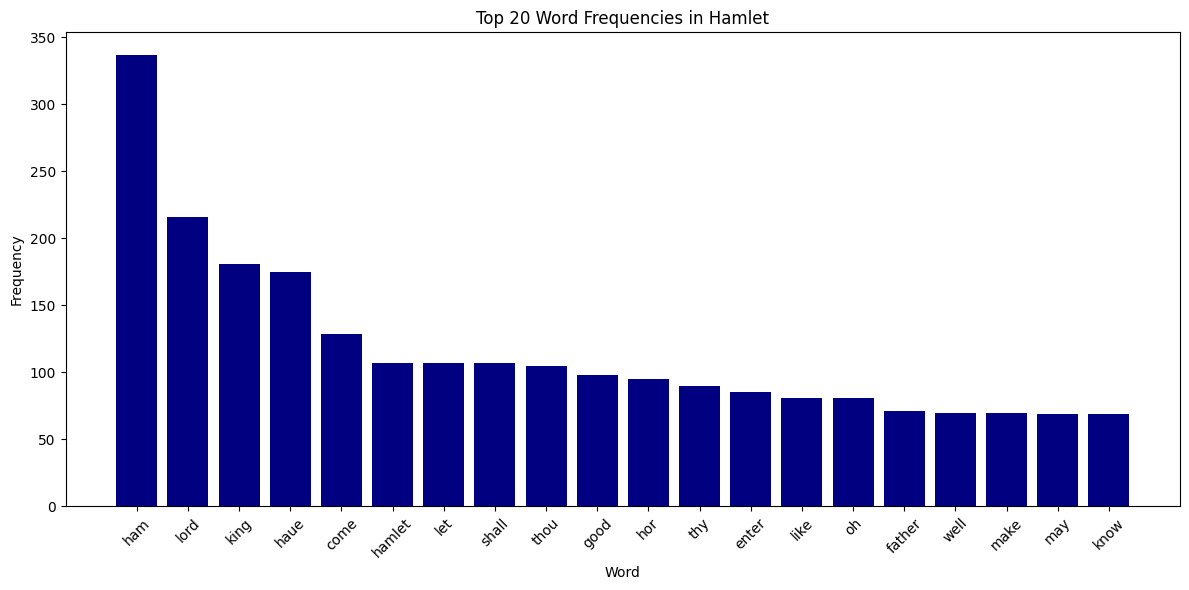

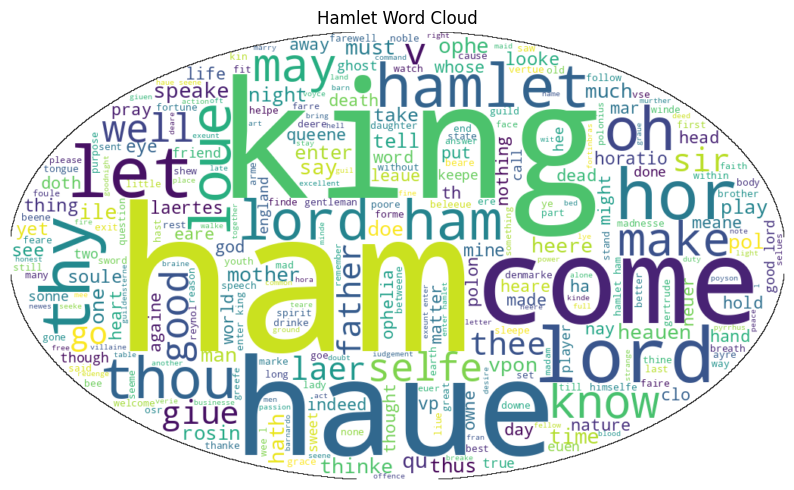

In [5]:
# ---------------------------------------------------------
# Homework 6 Word Cloud and Hamlet
# ---------------------------------------------------------

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


nltk.download('brown')
nltk.download('averaged_perceptron_tagger')

# ---------------------------------------------------------
# Install required libraries
# ---------------------------------------------------------
!pip install requests wordcloud imageio matplotlib textblob

import requests
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import imageio.v3 as imageio
from collections import Counter
import numpy as np

# ---------------------------------------------------------
# 1. Download Hamlet
# ---------------------------------------------------------
url = "https://www.gutenberg.org/files/2265/2265-0.txt"
response = requests.get(url)
data = response.text

blob = TextBlob(data)

# ---------------------------------------------------------
# 2. Preprocess text
# ---------------------------------------------------------
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

words = [
    lemmatizer.lemmatize(w.lower())
    for w in blob.words
    if w.isalpha() and w.lower() not in stop_words
]

# ---------------------------------------------------------
# 3. Compute 20 word frequencies
# ---------------------------------------------------------
freq = Counter(words)
top20 = freq.most_common(20)

# ---------------------------------------------------------
# 4. Plot 20 bar chart
# ---------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.bar([w for w, c in top20], [c for w, c in top20], color="navy")
plt.xticks(rotation=45)
plt.title("Top 20 Word Frequencies in Hamlet")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 5. Load mask image
# ---------------------------------------------------------
mask_url = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(mask_url)
mask_array = np.array(mask_image)

# ---------------------------------------------------------
# 6. Generate Word Cloud
# ---------------------------------------------------------
wc = WordCloud(
    background_color="white",
    max_words=300,
    mask=mask_array,
    contour_width=1,
    contour_color="black"
)

wc.generate(" ".join(words))

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Hamlet Word Cloud")
plt.show()
